In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.PropertyMol import PropertyMol
Chem.SetDefaultPickleProperties(Chem.PropertyPickleOptions.AllProps)
import pickle
import sys
from pathlib import Path

In [2]:
sys.path.append('../recombination')
sys.path.append('../recombination/construct_ligands')
from construct_ligand import construct_ligand, read_fragment_library
from novelty import read_scaffolds

In [3]:
def pickle_loader(pickle_file):

    try:
        while True:
            yield pickle.load(pickle_file)
    except EOFError:
        pass

In [4]:
file_name = '../CombinatorialLibrary/combinatorial_library.pickle'

In [5]:
# with open(file_name, 'rb') as pickle_file:
#     ligands = []
#     for ligand in pickle_loader(pickle_file):
#         ligands.append(ligand)

In [6]:
data = read_fragment_library(Path('../FragmentLibrary'))

Number of fragments in FP : 220
Number of fragments in B2 : 55
Number of fragments in AP : 238
Number of fragments in SE : 169
Number of fragments in B1 : 30
Number of fragments in GA : 124


In [14]:
count_original = 0
count_original_sub = 0
chembl_match = 0
with open(file_name, 'rb') as pickle_file:
    
    for i, ligand in enumerate(pickle_loader(pickle_file)):
    
        count_original += ligand.original
        count_original_sub += ligand.original_sub
        chembl_match += ligand.chembl_match

KeyboardInterrupt: 

In [417]:
count_original, count_original_sub, chembl_match

(39, 191, 138)

In [20]:
# chembl matches
chembl_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        #if ligand.mwt == 0 and ligand.lipinski == 0:
        if ligand.chembl_match == 1:
            count += 1
            print(count, i+1)
            chembl_ligands.append(ligand)

1 2316182
2 2316623
3 2317336
4 2319970
5 2323089
6 2331391
7 2331942
8 2334755
9 2335284
10 2343394
11 2348001
12 2357280
13 2359883
14 2360642
15 2368382
16 2374485
17 2375383
18 2377667
19 2382754
20 2390181
21 2391315
22 2395095
23 2395638
24 2405860
25 2406373
26 2409472
27 2415499
28 2420133
29 2420416
30 2424614
31 2425859
32 2429611
33 2437213
34 2437639
35 2446352
36 2447719
37 2450012
38 2455559
39 2456583
40 2456655
41 2459994
42 2480437
43 2482080
44 2483824
45 2492532
46 2492989
47 2493150
48 2493435
49 2509476
50 2514074
51 2514835
52 2519904
53 2520320
54 2521639
55 2524144
56 2534878
57 2538345
58 2553267
59 2553344
60 2563300
61 2572673
62 2573999
63 2574129
64 2574674
65 2592644
66 2602921
67 2603438
68 2604707
69 2605078
70 2606957
71 2609133
72 2614672
73 2616070
74 2620012
75 2624558
76 2627136
77 2627573
78 2631810
79 2632405
80 2656629
81 2658758
82 2662643
83 2668336
84 2673537
85 2695961
86 2695970
87 2703652
88 2708191
89 2708634
90 2721604
91 2721784
92 27235

In [27]:
chembl_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data)[0])) for ligand in chembl_ligands]

In [65]:
[(i, Chem.MolToSmiles(mol))for i, mol in enumerate(chembl_mols)]

[(0, 'Fc1ccc(Nc2ncnc3c2cnn3-c2ccccc2)cc1'),
 (1, 'Nc1n[nH]c2cc(-c3ccncc3)ccc12'),
 (2, 'COCCC(=O)OC'),
 (3, 'CNc1nccc(-c2ccc3c(N)n[nH]c3c2)n1'),
 (4, 'COc1cc(C=C2N=C(N)NC2=O)ccc1O'),
 (5, 'Nc1ccc(-c2ccccc2F)nc1C(=O)Nc1cnccc1N1CCC[C@H]([NH3+])C1'),
 (6, 'CCOC(=O)C1CC[NH2+]CC1'),
 (7, 'CCc1cc2c(cc1N1CC[NH2+]CC1)C(C)(C)c1[nH]c3cc(C#N)ccc3c1C2=O'),
 (8, 'O=C(c1ccccc1)c1ccc(O)cc1'),
 (9, 'NS(=O)(=O)c1ccc(Nc2cncc(Cl)n2)cc1'),
 (10, 'Oc1ccc(Oc2ccccc2)cc1'),
 (11, 'CC(C)(C)c1ccc(O)cc1'),
 (12, 'Cc1nc(C)c(-c2csc(N)n2)s1'),
 (13, 'CC(=O)C=Cc1cccc(C(F)(F)F)c1'),
 (14, 'c1csc(CNc2cc(-c3ccoc3)ncn2)c1'),
 (15, 'CCOC(=O)C(F)(F)F'),
 (16, 'Nc1nc(Nc2ccc(S(N)(=O)=O)cc2)sc1C(=O)c1ccccc1'),
 (17, 'CC(C)n1c(=O)ccc2cnc(N[C@H]3CC[C@H](O)CC3)nc21'),
 (18, 'c1cncc(-c2cc(NCc3cccs3)ncn2)c1'),
 (19, 'Nc1nn(-c2cccc(-c3ccc4cc[nH]c4c3)c2)cc1-c1ccc2c(c1)CCNC2=O'),
 (20, 'CC(=O)N1CC[NH+]([C@H]2CC[C@H](Nc3ncnc4[nH]cc(C5CCOCC5)c34)CC2)CC1'),
 (21, 'CCOC(=O)c1ccc(S(N)(=O)=O)cc1'),
 (22, 'NNC(=O)Cc1ccsc1'),
 (23, 'CCOC(=O

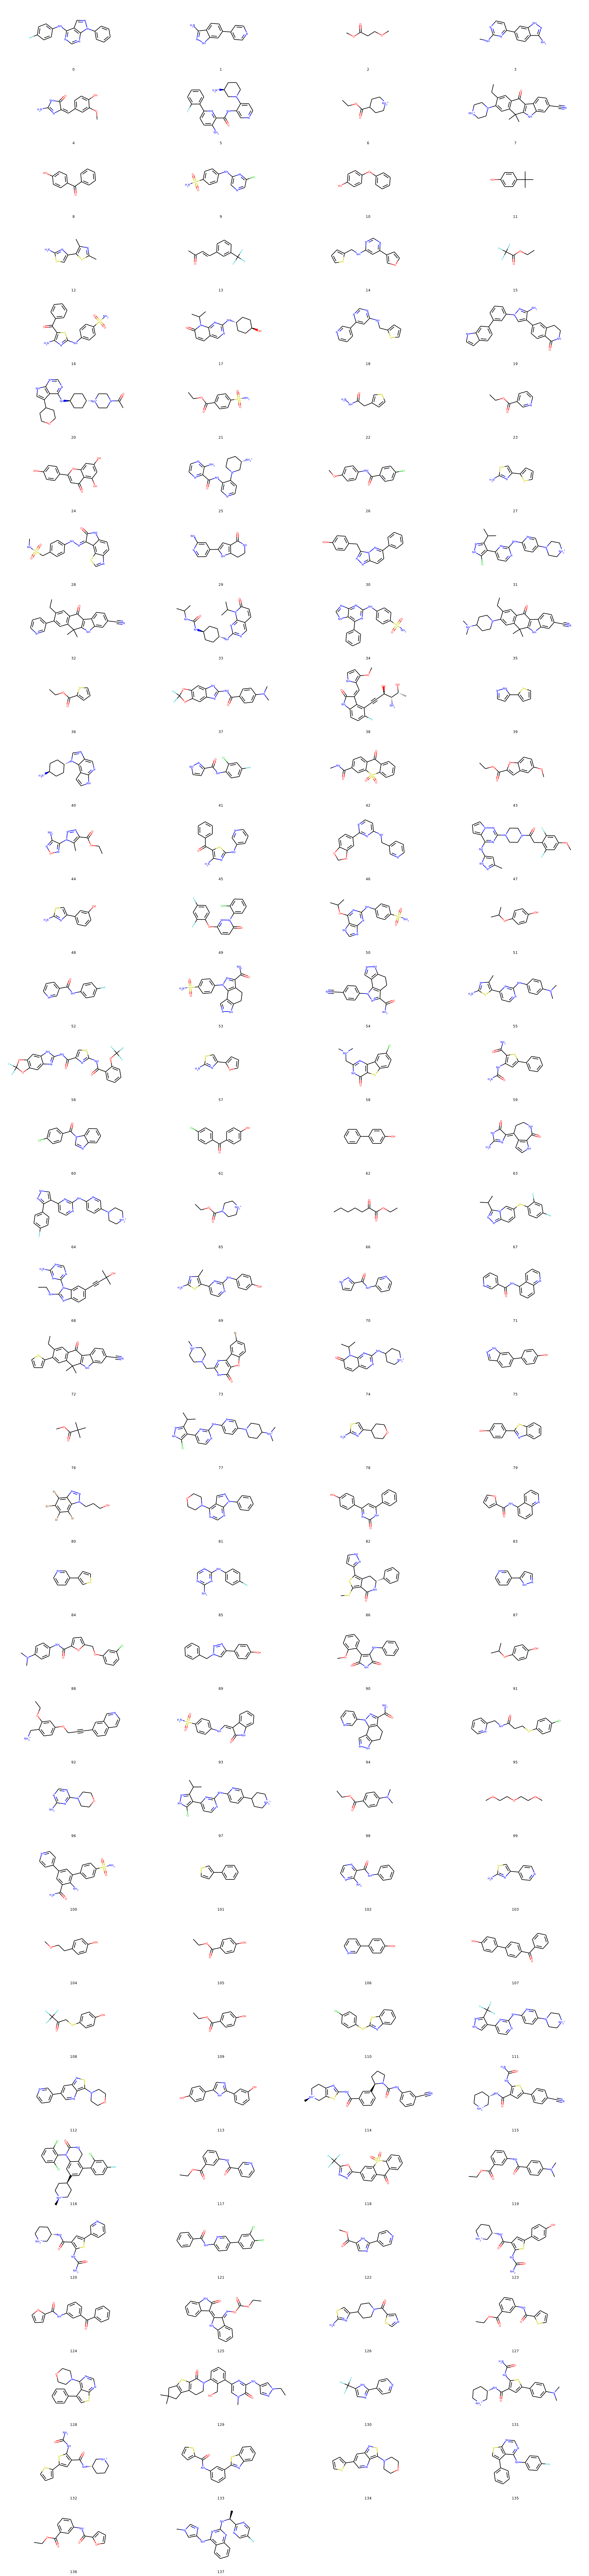

In [63]:
Draw.MolsToGridImage(chembl_mols, molsPerRow=4, maxMols=150, subImgSize=(500, 250), legends=[str(i) for i in range(138)])

In [21]:
# klifs matches
original_ligands = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 1:
            count += 1
            print(count, i+1)
            original_ligands.append(ligand)

1 2341815
2 2346675
3 2385486
4 2390181
5 2406373
6 2409472
7 2412850
8 2420416
9 2421663
10 2428346
11 2429611
12 2437639
13 2456583
14 2490603
15 2493435
16 2507338
17 2535200
18 2563300
19 2574674
20 2592374
21 2600129
22 2605078
23 2611954
24 2614672
25 2620012
26 2635475
27 2653230
28 2658758
29 2688330
30 2703652
31 2726913
32 2733868
33 2734077
34 2778913
35 10124739
36 14587502
37 14587952
38 14889500
39 15235045


In [42]:
original_mols = [Chem.MolFromSmiles(Chem.MolToSmiles(construct_ligand(ligand.meta, data)[0])) for ligand in original_ligands]

In [54]:
original_legend = [str(construct_ligand(ligand.meta, data)[1]) for ligand in original_ligands]

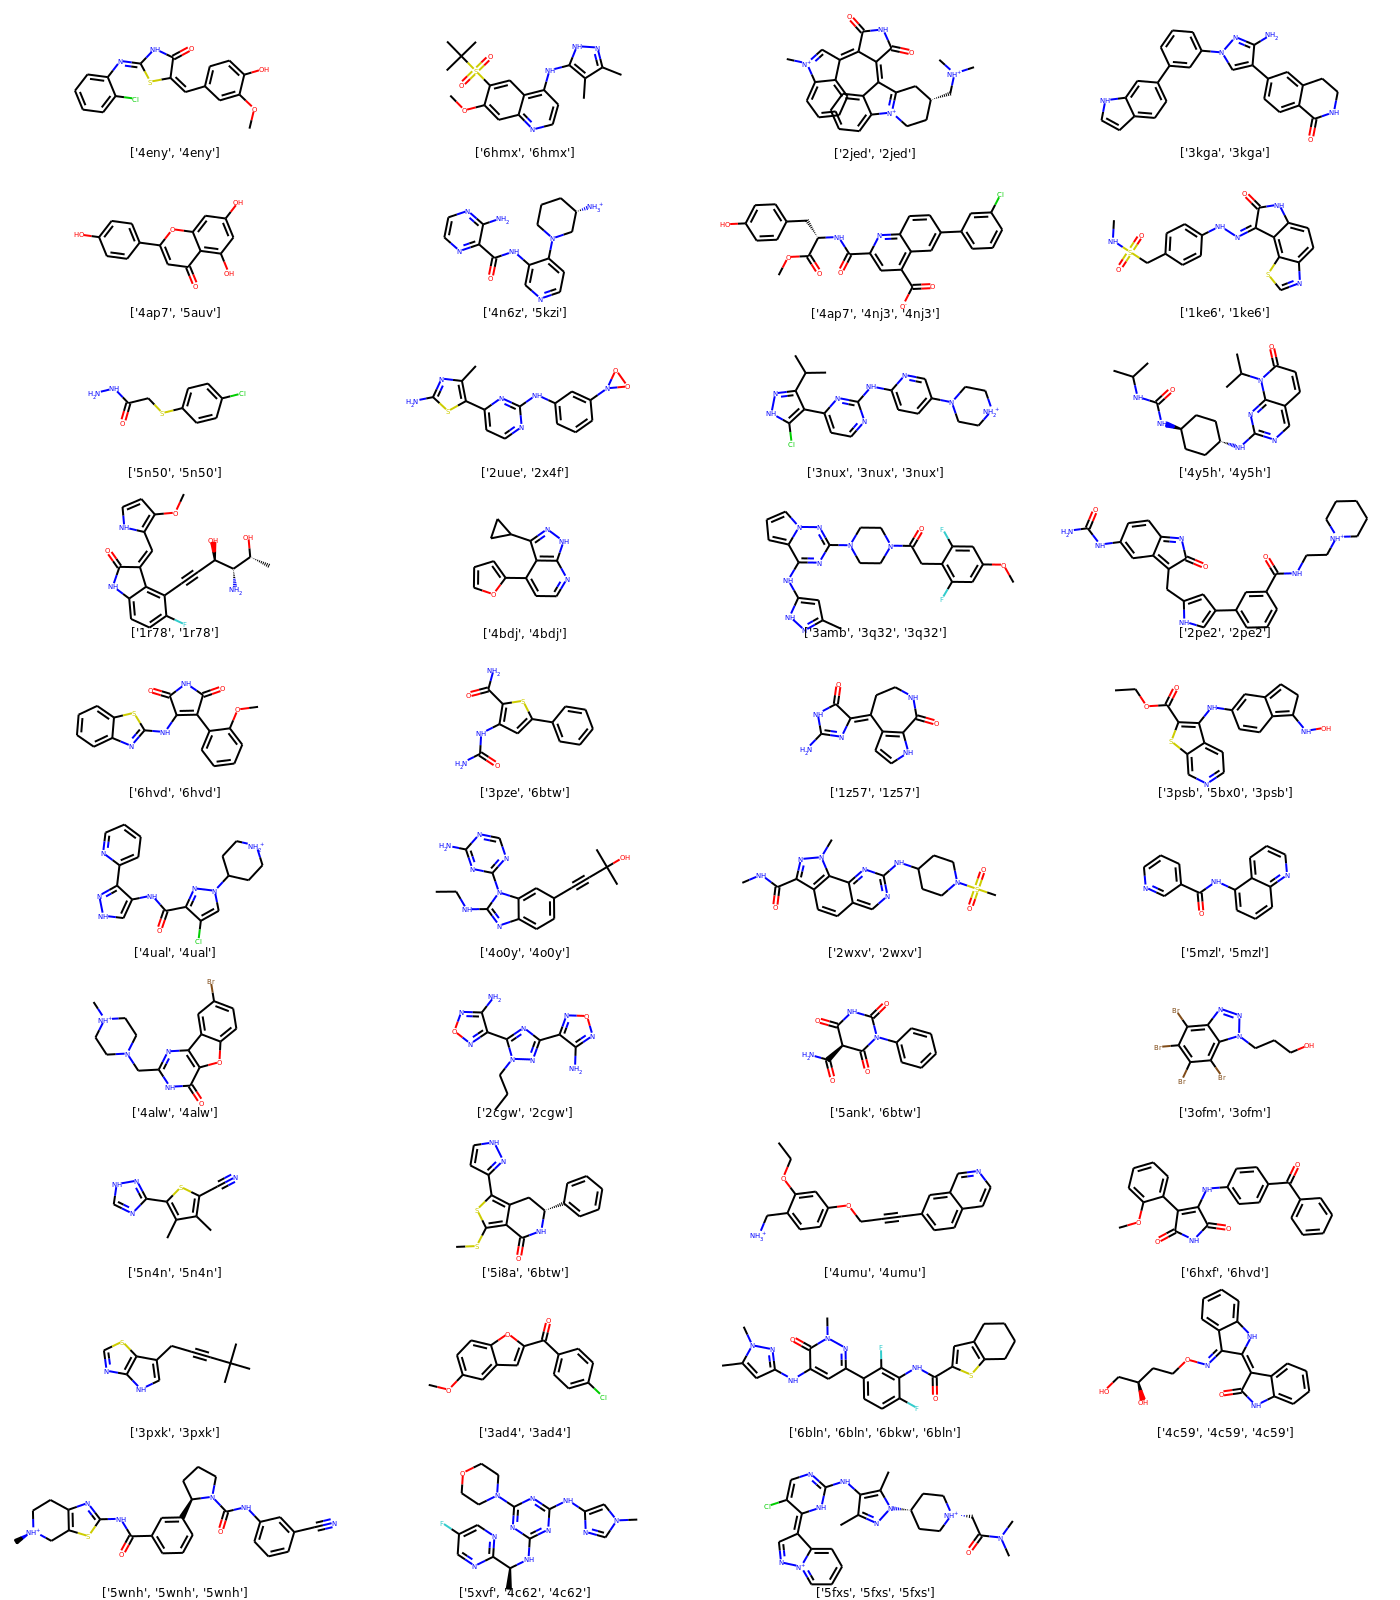

In [55]:
Draw.MolsToGridImage(original_mols, molsPerRow=4, maxMols=150, subImgSize=(350, 160), legends=original_legend)

In [59]:
# novel ligand fulfilling all conditions
lst = []
with open(file_name, 'rb') as pickle_file:
    
    count = 0
    for i, ligand in enumerate(pickle_loader(pickle_file)):
        if ligand.original == 0 and ligand.original_sub == 0 and ligand.chembl_match == 0 and ligand.lipinski == 1 and \
            ligand.hbd == 1 and ligand.hba == 1 and ligand.mwt == 1 and ligand.logp == 1:
            lst.append(i+1)

KeyboardInterrupt: 

In [766]:
# select a certain ligand
with open(file_name, 'rb') as pickle_file:
    
    #612
    for i in range(lst[612]):
        ligand = next(pickle_loader(pickle_file))

In [767]:
mol = construct_ligand(ligand.meta, data)[0]

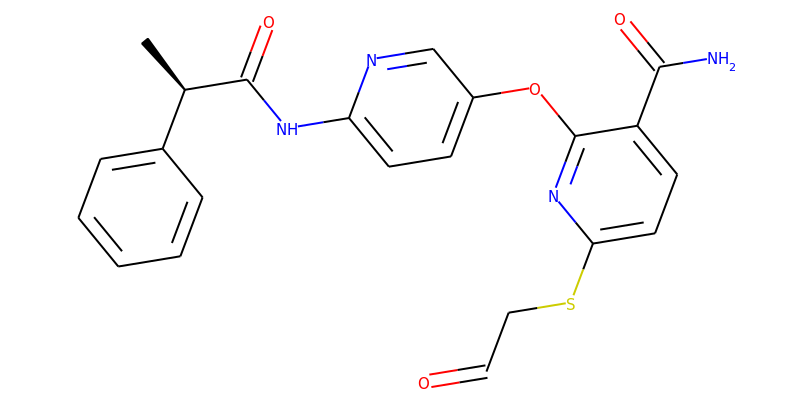

In [768]:
AllChem.Compute2DCoords(mol)
# Draw.MolsToGridImage([mol], subImgSize=(400, 250), molsPerRow=1)
Draw.MolsToGridImage([Chem.MolFromSmiles(Chem.MolToSmiles(mol))], subImgSize=(800, 400), molsPerRow=1)

In [769]:
ligand.original, ligand.original_sub, ligand.chembl_match

(0, 0, 0)

In [770]:
ligand.lipinski, ligand.hba, ligand.hbd, ligand.mwt, ligand.logp

(1, 1, 1, 1, 1)

In [771]:
highlightAtomLists = []
legends = []
for subpocket in ['AP', 'FP', 'SE', 'GA', 'B1', 'B2']:
    highlight_atoms = []
    legend = subpocket
    for atom in mol.GetAtoms():
        if atom.HasProp('subpocket'):
            if atom.GetProp('subpocket') == subpocket:
                highlight_atoms.append(atom.GetIdx())
                legend = subpocket + ': '+atom.GetProp('frag_id')
    highlightAtomLists.append(highlight_atoms)
    legends.append(legend)

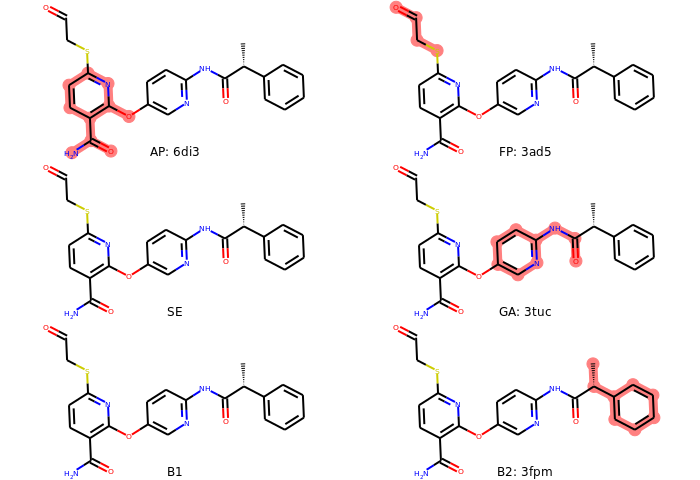

In [772]:
Draw.MolsToGridImage([mol, mol, mol, mol, mol, mol], 
                     highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))

In [77]:
# highlightAtomLists = list(highlightAtomLists[i] for i in [0,2,3,4])
# legends = list(legends[i] for i in [0,2,3,4])
# Draw.MolsToGridImage([mol, mol, mol, mol], 
#                      highlightAtomLists=highlightAtomLists, legends=legends, molsPerRow=2, subImgSize=(350, 160))

In [ ]:
novel_but_scaffold = []
not_novel_but_no_scaffold = []
for i, l in enumerate(ligands):
    if l.chembl_match == 0 and l.original == 0 and l.original_sub == 0 and l.lipinski == 1 and l.scaffold:
        novel_but_scaffold.append(i)
    if l.chembl_match == 1 or l.original == 1 or l.original_sub == 1:
        if l.scaffold == 0:
            not_novel_but_no_scaffold.append(i)
    
    
print('\nNot novel but no scaffold:', not_novel_but_no_scaffold, len(not_novel_but_no_scaffold))
print('\nNovel but contains scaffold and fulfills Lipinski:', len(novel_but_scaffold))

In [87]:
# kinase inhibitor scaffolds identified by Hu and Bajorath (dx.doi.org/10.1021/jm501237k | J. Med. Chem. 2015, 58, 315−332)
scaffolds = read_scaffolds(['../../data/Kinase_Inhibitors_And_Scaffolds/Ki_Subset/Kinase_Based_Scaffold_Sets_Ki.dat',
                            '../../data/Kinase_Inhibitors_And_Scaffolds/IC50_Subset/Kinase_Based_Scaffold_Sets_IC50.dat'])

Read ../../data/Kinase_Inhibitors_And_Scaffolds/Ki_Subset/Kinase_Based_Scaffold_Sets_Ki.dat
Read ../../data/Kinase_Inhibitors_And_Scaffolds/IC50_Subset/Kinase_Based_Scaffold_Sets_IC50.dat
Number of kinase inhibitor scaffolds: 12858


RDKit WARNING: [13:09:55] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


,Kinase_CHEMBLID,KinaseName,KinaseGroup,BM_ID,NumInhibitors,BM_SMILES,CSK_SMILES,InhibitorList[sortedByCHEMBLID],mol
161,CHEMBL2276,c-Jun N-terminal kinase 1,CMGC,39015,2,n1ccccc1,C1CCCCC1,CHEMBL208637|CHEMBL211605,
279,CHEMBL2637,c-Jun N-terminal kinase 3,CMGC,39015,1,n1ccccc1,C1CCCCC1,CHEMBL208637,
307,CHEMBL267,Tyrosine-protein kinase SRC,TK,33365,1,c1ccccc1,C1CCCCC1,CHEMBL217863,
585,CHEMBL299,Protein kinase C alpha,AGC,33365,2,c1ccccc1,C1CCCCC1,CHEMBL494361|CHEMBL523053,
609,CHEMBL2996,Protein kinase C delta,AGC,33365,2,c1ccccc1,C1CCCCC1,CHEMBL494361|CHEMBL523053,
620,CHEMBL3023,Sphingosine kinase 2,OTHER,33365,1,c1ccccc1,C1CCCCC1,CHEMBL583979,
1108,CHEMBL4394,Sphingosine kinase 1,OTHER,33365,2,c1ccccc1,C1CCCCC1,CHEMBL2409758|CHEMBL583979,
1192,CHEMBL4900,Serine/threonine-protein kinase D2,CAMK,39015,1,n1ccccc1,C1CCCCC1,CHEMBL208637,
1222,CHEMBL5469,Protein tyrosine kinase 2 beta,TK,33365,1,c1ccccc1,C1CCCCC1,CHEMBL76904,
203,CHEMBL1741200,Putative hexokinase HKDC1,OTHER,33365,1,c1ccccc1,C1CCCCC1,CHEMBL1451059,

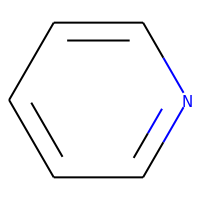
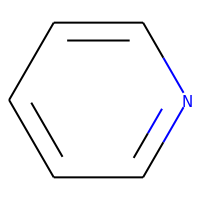
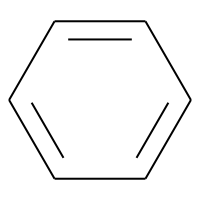
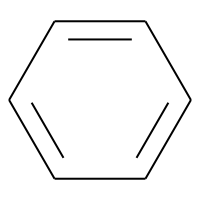
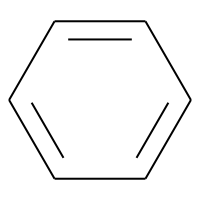
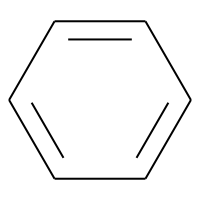
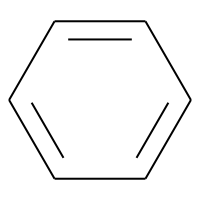
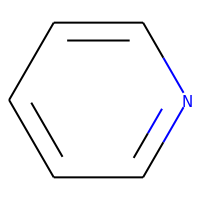
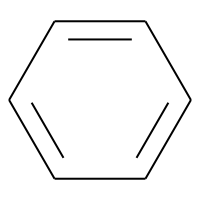
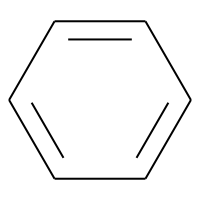
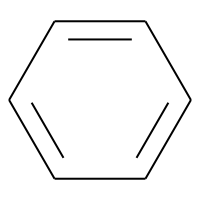
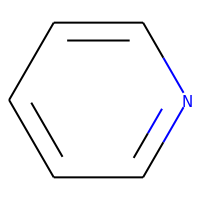
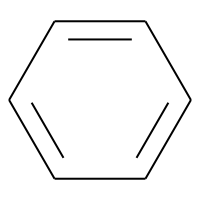
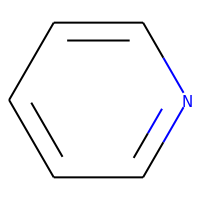
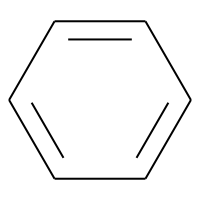
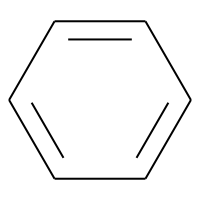
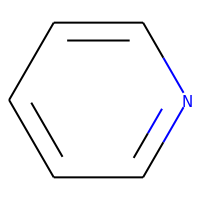
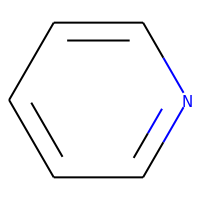
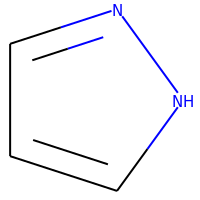
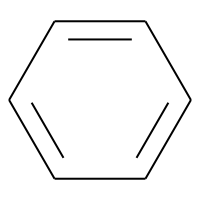
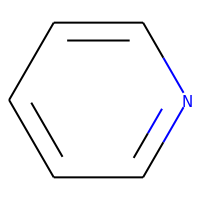
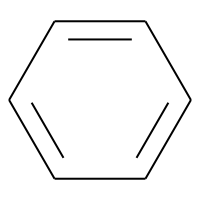
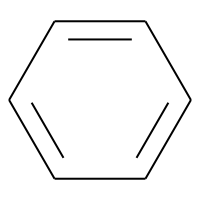
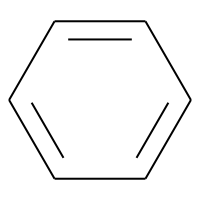
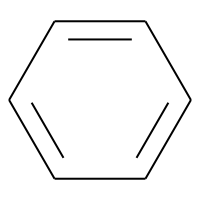
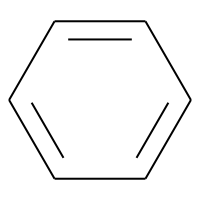
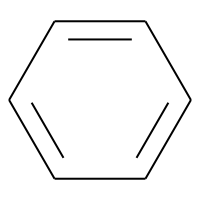
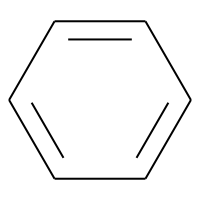
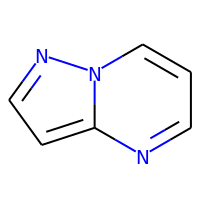
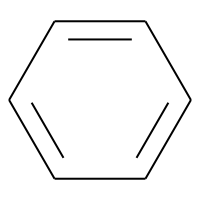
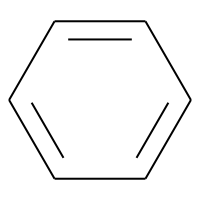
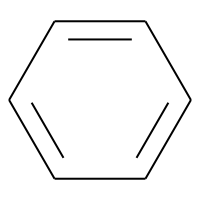
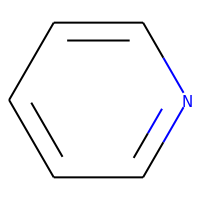
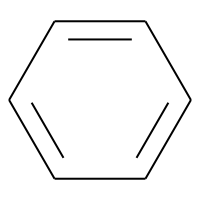
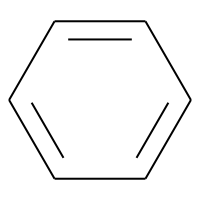
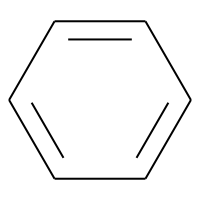
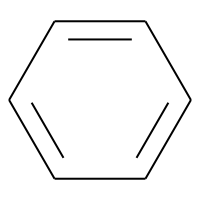

In [90]:
scaffolds[scaffolds.mol <= mol]